<a href="https://colab.research.google.com/github/dhanyamk2948/YouTube-Germany-deepdive/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Top 1000 most subscribed YouTube channels in Germany as of 13th Feb 2025

Import Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Read the csv file containing dataset

In [ ]:
df = pd.read_csv('/content/top-1000-most-subscribed-youtube-channels-in-germany.csv')

Query the top few lines od the data to understand overview

In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,Tsuriki Show,"34,100,000","42,490,526,838","4,739",Entertainment,2019
1,2,Kidibli (Kinder Spielzeug Kanal),"29,600,000","15,673,364,837","1,236",Entertainment,2015
2,3,Kurzgesagt – In a Nutshell,"23,600,000","3,145,706,013",271,Education,2013
3,4,boxtoxtv,"23,500,000","18,303,986,629","1,559",Comedy,2022
4,5,HaerteTest,"19,500,000","3,420,864,412","1,712",Science & Technology,2011


Rowas and columns in the dataset

In [ ]:
df.shape

(1000, 7)

Get the list of all the columns in the dataset

In [ ]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

Basic statistics about the data

In [ ]:
df.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2014.745000
std,288.819436,4.243581
min,1.000000,2005.000000
25%,250.750000,2012.000000
50%,500.500000,2015.000000
75%,750.250000,2018.000000
max,1000.000000,2024.000000


#To find out if old channels have more view or the new ones


sort the started column in ascending order

In [ ]:
df1 = df[['Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started']].sort_values(by='started' ,ascending=True).head(10)

In [ ]:
df1['video views'].sum()

'1,633,836,225539,375,350698,389,036322,697,047226,341,810342,827,0751,482,242,398598,389,359128,822,5002,417,916,324'

In [ ]:
df2 = df[['Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started']].sort_values(by='started' ,ascending=False).head(10)

In [ ]:
df2['video views'].sum()

'540,452,969647,619,721135,976,7941,073,676,342829,864,57564,177,111398,722,720269,160,37616,954,772346,575,332'

In [ ]:
if df1['video views'].sum() > df2['video views'].sum():
  print('Old channels have more views')
else:
  print('New channels have more views')

New channels have more views


#Category-wise ranking in terms of subscribers, video views and video count

Convert subscribers, video views and video count from string into numbers and since the umber will be too big represent them as millions

In [ ]:
df['subscribers'] = df['subscribers'].str.replace(',', '', regex=True).astype(float)
df['Subscribers in Mn'] = df['subscribers'] / 1_000_000
df['video views'] = df['video views'].str.replace(',', '', regex=True).astype(float)
df['Video Views in Mn'] = df['video views'] / 1_000_000
df['Video Count in Mn'] = df['video views'] / 1_000_000
df[['category','Subscribers in Mn']].groupby(by='category').sum().sort_values(by='Subscribers in Mn', ascending=False).head(3)
#print(df[['category','Subscribers in Mn']].groupby(by='category').sum().sort_values(by='Subscribers in Mn', ascending=False).head(3))

,Subscribers in Mn
category,
Entertainment,529.579128
People & Blogs,231.487000
Gaming,224.766000


Conclusion : Entertainment, People and Blogs and Gaming are the most subscribed categories



In [ ]:
df[['category','Video Views in Mn']].groupby(by='category').sum().sort_values(by='Video Views in Mn', ascending=False).head(3)

,Video Views in Mn
category,
Entertainment,278781.706055
Gaming,103125.599957
People & Blogs,83893.467295


Conclusion : Entertainment, Gaming and People and Blogs are the most viewed categories



In [ ]:
df[['category','Video Count in Mn']].groupby(by='category').sum().sort_values(by='Video Count in Mn', ascending=False).head(3)

,Video Count in Mn
category,
Entertainment,278781.706055
Gaming,103125.599957
People & Blogs,83893.467295


Conclusion : Entertainment, Gaming and People and Blogs are the most videos categories

In [ ]:
import matplotlib.pyplot as plt

# Group by 'category' and sum up
category_subscribers = df.groupby('category')['Subscribers in Mn'].sum().sort_values(ascending=False).head(3)
category_views = df.groupby('category')['Video Views in Mn'].sum().sort_values(ascending=False).head(3)
category_videos = df.groupby('category')['Video Count in Mn'].sum().sort_values(ascending=False).head(3)

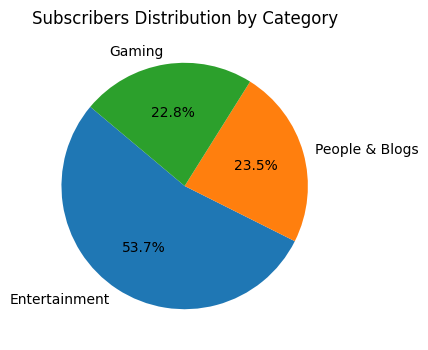

In [ ]:
# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_subscribers, labels=category_subscribers.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscribers Distribution by Category')
plt.show()

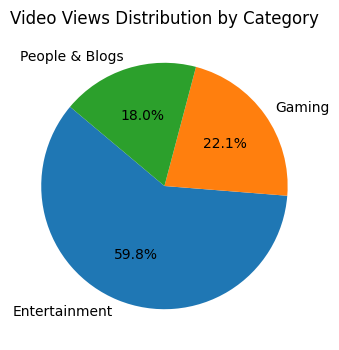

In [ ]:
# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_views, labels=category_views.index, autopct='%1.1f%%', startangle=140)
plt.title('Video Views Distribution by Category')
plt.show()

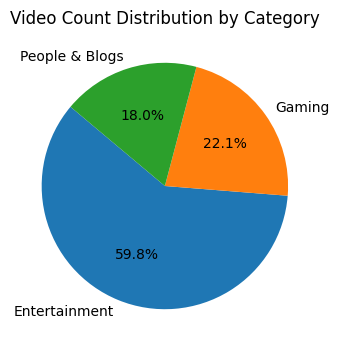

In [ ]:
# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_videos, labels=category_videos.index, autopct='%1.1f%%', startangle=140)
plt.title('Video Count Distribution by Category')
plt.show()

#Declaring Top Youtuber based on Subscibers, views and video count

Top Youtuber based on Number of Subscribers

In [ ]:
df[['Youtuber', 'subscribers', 'category']].sort_values(by='subscribers', ascending=False).head(10)

,Youtuber,subscribers,category
0,Tsuriki Show,34100000.0,Entertainment
1,Kidibli (Kinder Spielzeug Kanal),29600000.0,Entertainment
2,Kurzgesagt – In a Nutshell,23600000.0,Education
3,boxtoxtv,23500000.0,Comedy
4,HaerteTest,19500000.0,Science & Technology
5,Noel Robinson,18600000.0,Entertainment
6,FAMILY BOOMS,16800000.0,Entertainment
7,Talking Angela,13300000.0,Entertainment
8,Ice Cream Rolls,12400000.0,Entertainment
9,The Voice Kids,12200000.0,Entertainment


Top Youtuber based on Number of Views

In [ ]:
df[['Youtuber', 'video views', 'category']].sort_values(by='video views', ascending=False).head(10)

,Youtuber,video views,category
0,Tsuriki Show,4.249053e+10,Entertainment
3,boxtoxtv,1.830399e+10,Comedy
6,FAMILY BOOMS,1.622526e+10,Entertainment
1,Kidibli (Kinder Spielzeug Kanal),1.567336e+10,Entertainment
11,German Spidey,1.128007e+10,Comedy
5,Noel Robinson,1.075258e+10,Entertainment
13,ag_soccer team,9.196775e+09,Sports
45,ArkivaShqip,7.678417e+09,Entertainment
16,Rammstein Official,6.634640e+09,Entertainment
31,Paluten,5.564401e+09,Gaming


Top Youtuber based on Number of videos

In [ ]:
#df['video count'] = df['video count'].str.replace(',', '', regex=True).astype(int)
df[['Youtuber', 'video count', 'category']].sort_values(by='video count', ascending=False).head(10)

,Youtuber,video count,category
100,DVB TV News,102445,News & Politics
534,RTL,73899,News & Politics
180,WELT Nachrichtensender,59465,Pets & Animals
40,DW Español,44940,News & Politics
30,DW News,37999,News & Politics
252,BILD,31456,News & Politics
131,PietSmiet,28579,Entertainment
240,tagesschau,27227,News & Politics
574,SPORT1,23568,Sports
110,DW на русском,20153,News & Politics


Conclusion : In terms of subscribers and video views Tsuriki Show is the top YouTuber of Entertainment category whereas in terms of video count DVB TV News is the top YouTube channel of the category News & Politics.